In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = sp.symbols('r', positive=True)
T = sp.Function('T')

In [3]:
# Governing equation: d/dr(r dT/dr) = 0
ode = sp.Eq(sp.diff(r * sp.diff(T(r), r), r), 0)

In [4]:
# Solve symbolically
general_solution = sp.dsolve(ode)
print("General Solution T(r):", general_solution)

# Apply boundary conditions:
C1, C2, a, b, Ti, To = sp.symbols('C1 C2 a b Ti To')
T_expr = C1 * sp.log(r) + C2

# Boundary conditions:
# T(a) = Ti
# T(b) = To
sol = sp.solve([sp.Eq(T_expr.subs(r, a), Ti),
                sp.Eq(T_expr.subs(r, b), To)], [C1, C2])

C1_sol = sol[C1]
C2_sol = sol[C2]

# Final temperature distribution
T_final = sp.simplify(T_expr.subs({C1: C1_sol, C2: C2_sol}))
print("\nFinal Temperature Distribution T(r):")
sp.pprint(T_final)

General Solution T(r): Eq(T(r), C1 + C2*log(r))

Final Temperature Distribution T(r):
-Ti⋅log(b) + To⋅log(a) + (Ti - To)⋅log(r)
─────────────────────────────────────────
             log(a) - log(b)             


In [5]:
# SUBSTITUTE NUMERIC VALUES
# Given values
Ti_val = -1.0   # °C
To_val = 0.0    # °C
a_val  = 0.15   # m
b_val  = 0.20   # m

T_numeric = T_final.subs({Ti:Ti_val, To:To_val, a:a_val, b:b_val})
T_func = sp.lambdify(r, T_numeric, 'numpy')

print("\nNumeric Expression:")
sp.pprint(T_numeric)


Numeric Expression:
3.47605949678221⋅log(r) + 5.59450193999788


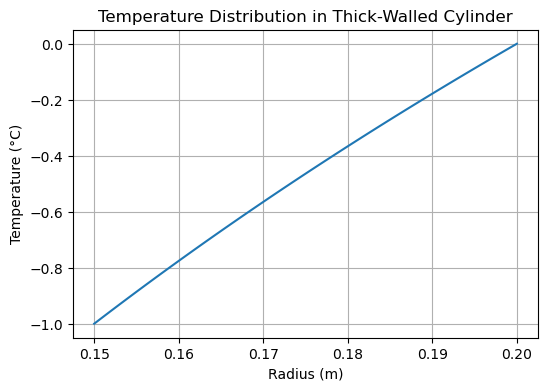


Heat Transfer Per Unit Length, Q' = -65.5222 W/m


In [6]:
# CREATE DATA AND PLOT
r_values = np.linspace(a_val, b_val, 50)
T_values = T_func(r_values)

plt.figure(figsize=(6,4))
plt.plot(r_values, T_values)
plt.xlabel("Radius (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Distribution in Thick-Walled Cylinder")
plt.grid(True)
plt.show()

# HEAT TRANSFER RATE (per unit length)
k = 3.0  # W/m·K
Q_prime = 2 * np.pi * k * (Ti_val - To_val) / np.log(b_val/a_val)
print("\nHeat Transfer Per Unit Length, Q' = {:.4f} W/m".format(Q_prime))